outlier before missing values-and hyperparmeter LGBMClassifier, all feature then feature selection 7

In [ ]:
# Import Library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from plotly import graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

**Data** **Acquisition and Data Retrieval**

In [ ]:
! kaggle datasets download -d arashnic/hr-analytics-job-change-of-data-scientists

hr-analytics-job-change-of-data-scientists.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"

In [ ]:
! kaggle datasets download -d arashnic/hr-analytics-job-change-of-data-scientists

hr-analytics-job-change-of-data-scientists.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! chmod 600 /content/kaggle.json

In [ ]:
! unzip hr-analytics-job-change-of-data-scientists.zip

Archive:  hr-analytics-job-change-of-data-scientists.zip
replace aug_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Read dataset
JC_DS = pd.read_csv('/content/aug_train.csv')
JC_DS

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


**Data Exploration**

In [ ]:
# Display columns(Features&Target)
JC_DS.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

Description each columns(Features&Target)
* enrollee_id: A unique identifier for each candidate.
* city: City code for each candidate.
* city_development_index:	Index for the development level of the city for each candidate.
* gender:	Gender for each candidate.
* relevent_experience:	Every candidate has relevant experience or not.
* enrolled_university:	The type of the enrollment of the university course for each candidate or don't enroll in any of its.
* education_level:	The education level for each candidate.
* major_discipline:	The main field of study for each candidate.
* experience:	Duration of the work experience for each candidate in years.
* company_size:	Number of employees in the company where each candidate works.
* company_type:	Type of company for each candidate work in it.
* last_new_job:	How many years has passed for each candidate since changing a new job or still work in the first job if already started work.
* training_hours:	How many training hours completed for each candidate in the company.
* target:	Each candidate don’t looking for a job change (0), or looking for job change (1).





In [ ]:
# Descriptive Statistic for Numerical Variables
JC_DS.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [ ]:
# Descriptive Statistic for Categorical Variables
JC_DS.describe(include = 'object')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [ ]:
# Display Data Shape
JC_DS.shape

(19158, 14)

In [ ]:
# Display Data Information
JC_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
#Display if there are any Duplicate entry
JC_DS.duplicated().sum()

0

In [ ]:
# Loop through each column and print the unique values
for column in JC_DS.columns:
    unique_values = JC_DS[column].unique()
    print(f"Column '{column}' has {len(unique_values)} unique values:")
    print(unique_values)

Column 'enrollee_id' has 19158 unique values:
[ 8949 29725 11561 ... 24576  5756 23834]
Column 'city' has 123 unique values:
['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'

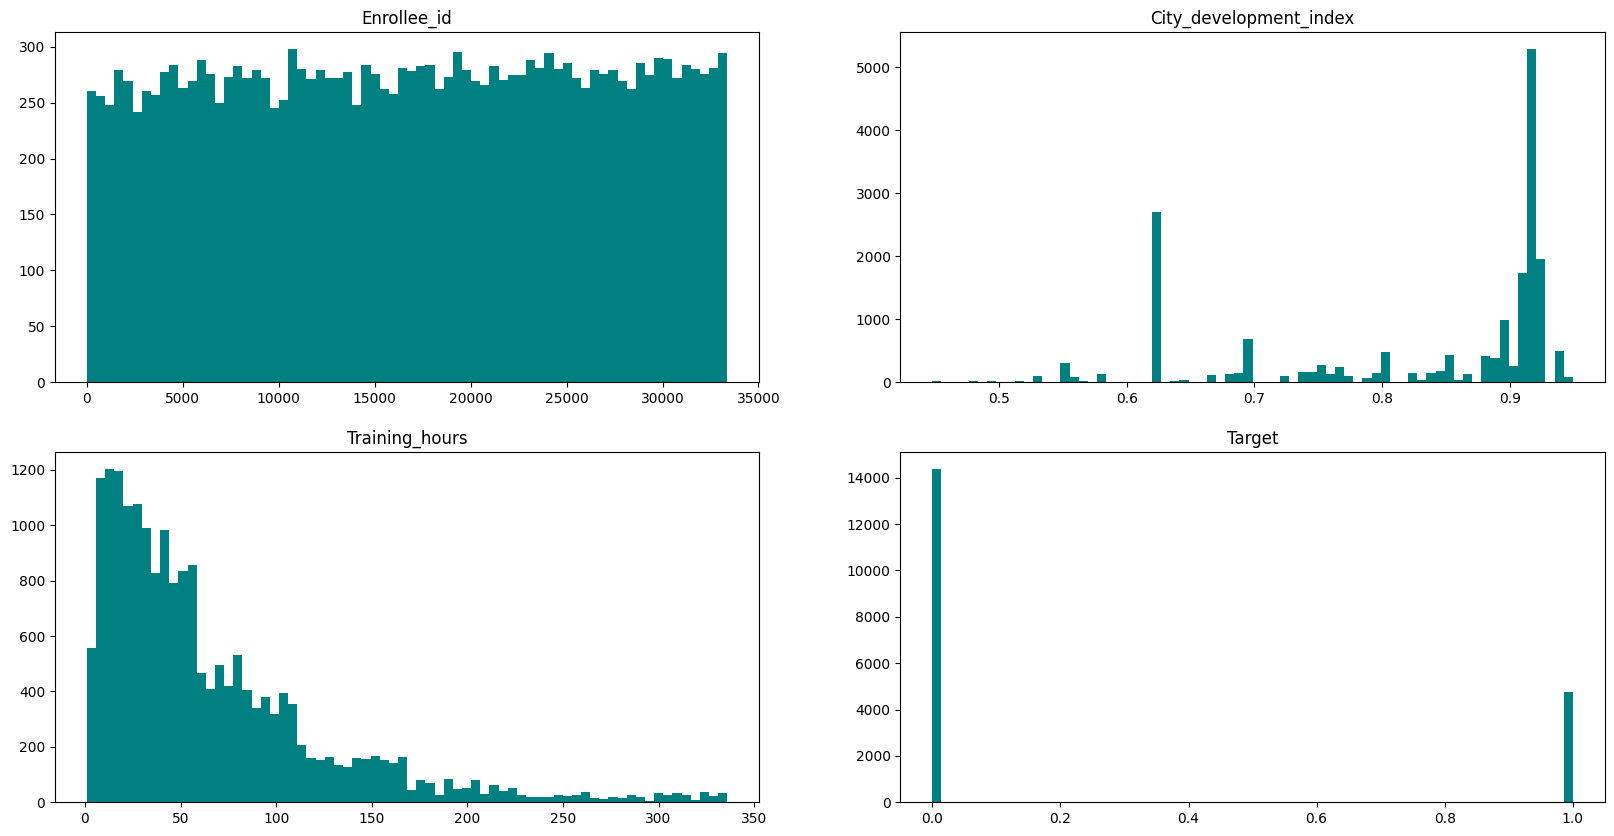

In [ ]:
# Dispay Distribution for Numerical Variables
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

for i, col in enumerate(['enrollee_id', 'city_development_index', 'training_hours', 'target']):
    axs[i//2, i%2].hist(JC_DS[col], bins=70, color='teal')
    axs[i//2, i%2].set_title(col.capitalize())

plt.show()

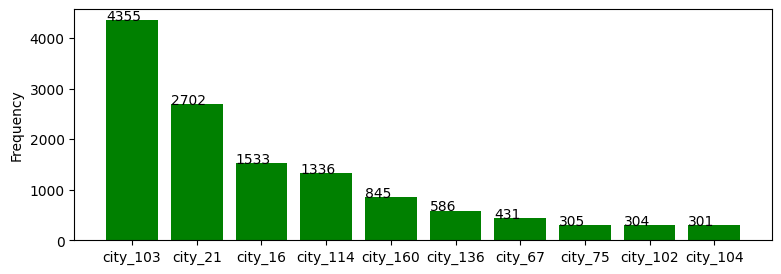

In [ ]:
# Display the Distribution of City Column
Count_city = pd.DataFrame(JC_DS['city'].value_counts())
Top_City = Count_city['city'][:10]
Which_10_City = Count_city.index[:10]

import matplotlib.pyplot as plt

plt.figure(figsize=(9,3))
bars = plt.bar(Which_10_City, Top_City, color="green")

for bar in bars:
    high_bar = bar.get_height()
    plt.text(bar.get_x(), high_bar + 0.05, high_bar, fontsize=10)

plt.ylabel("Frequency")
plt.show()

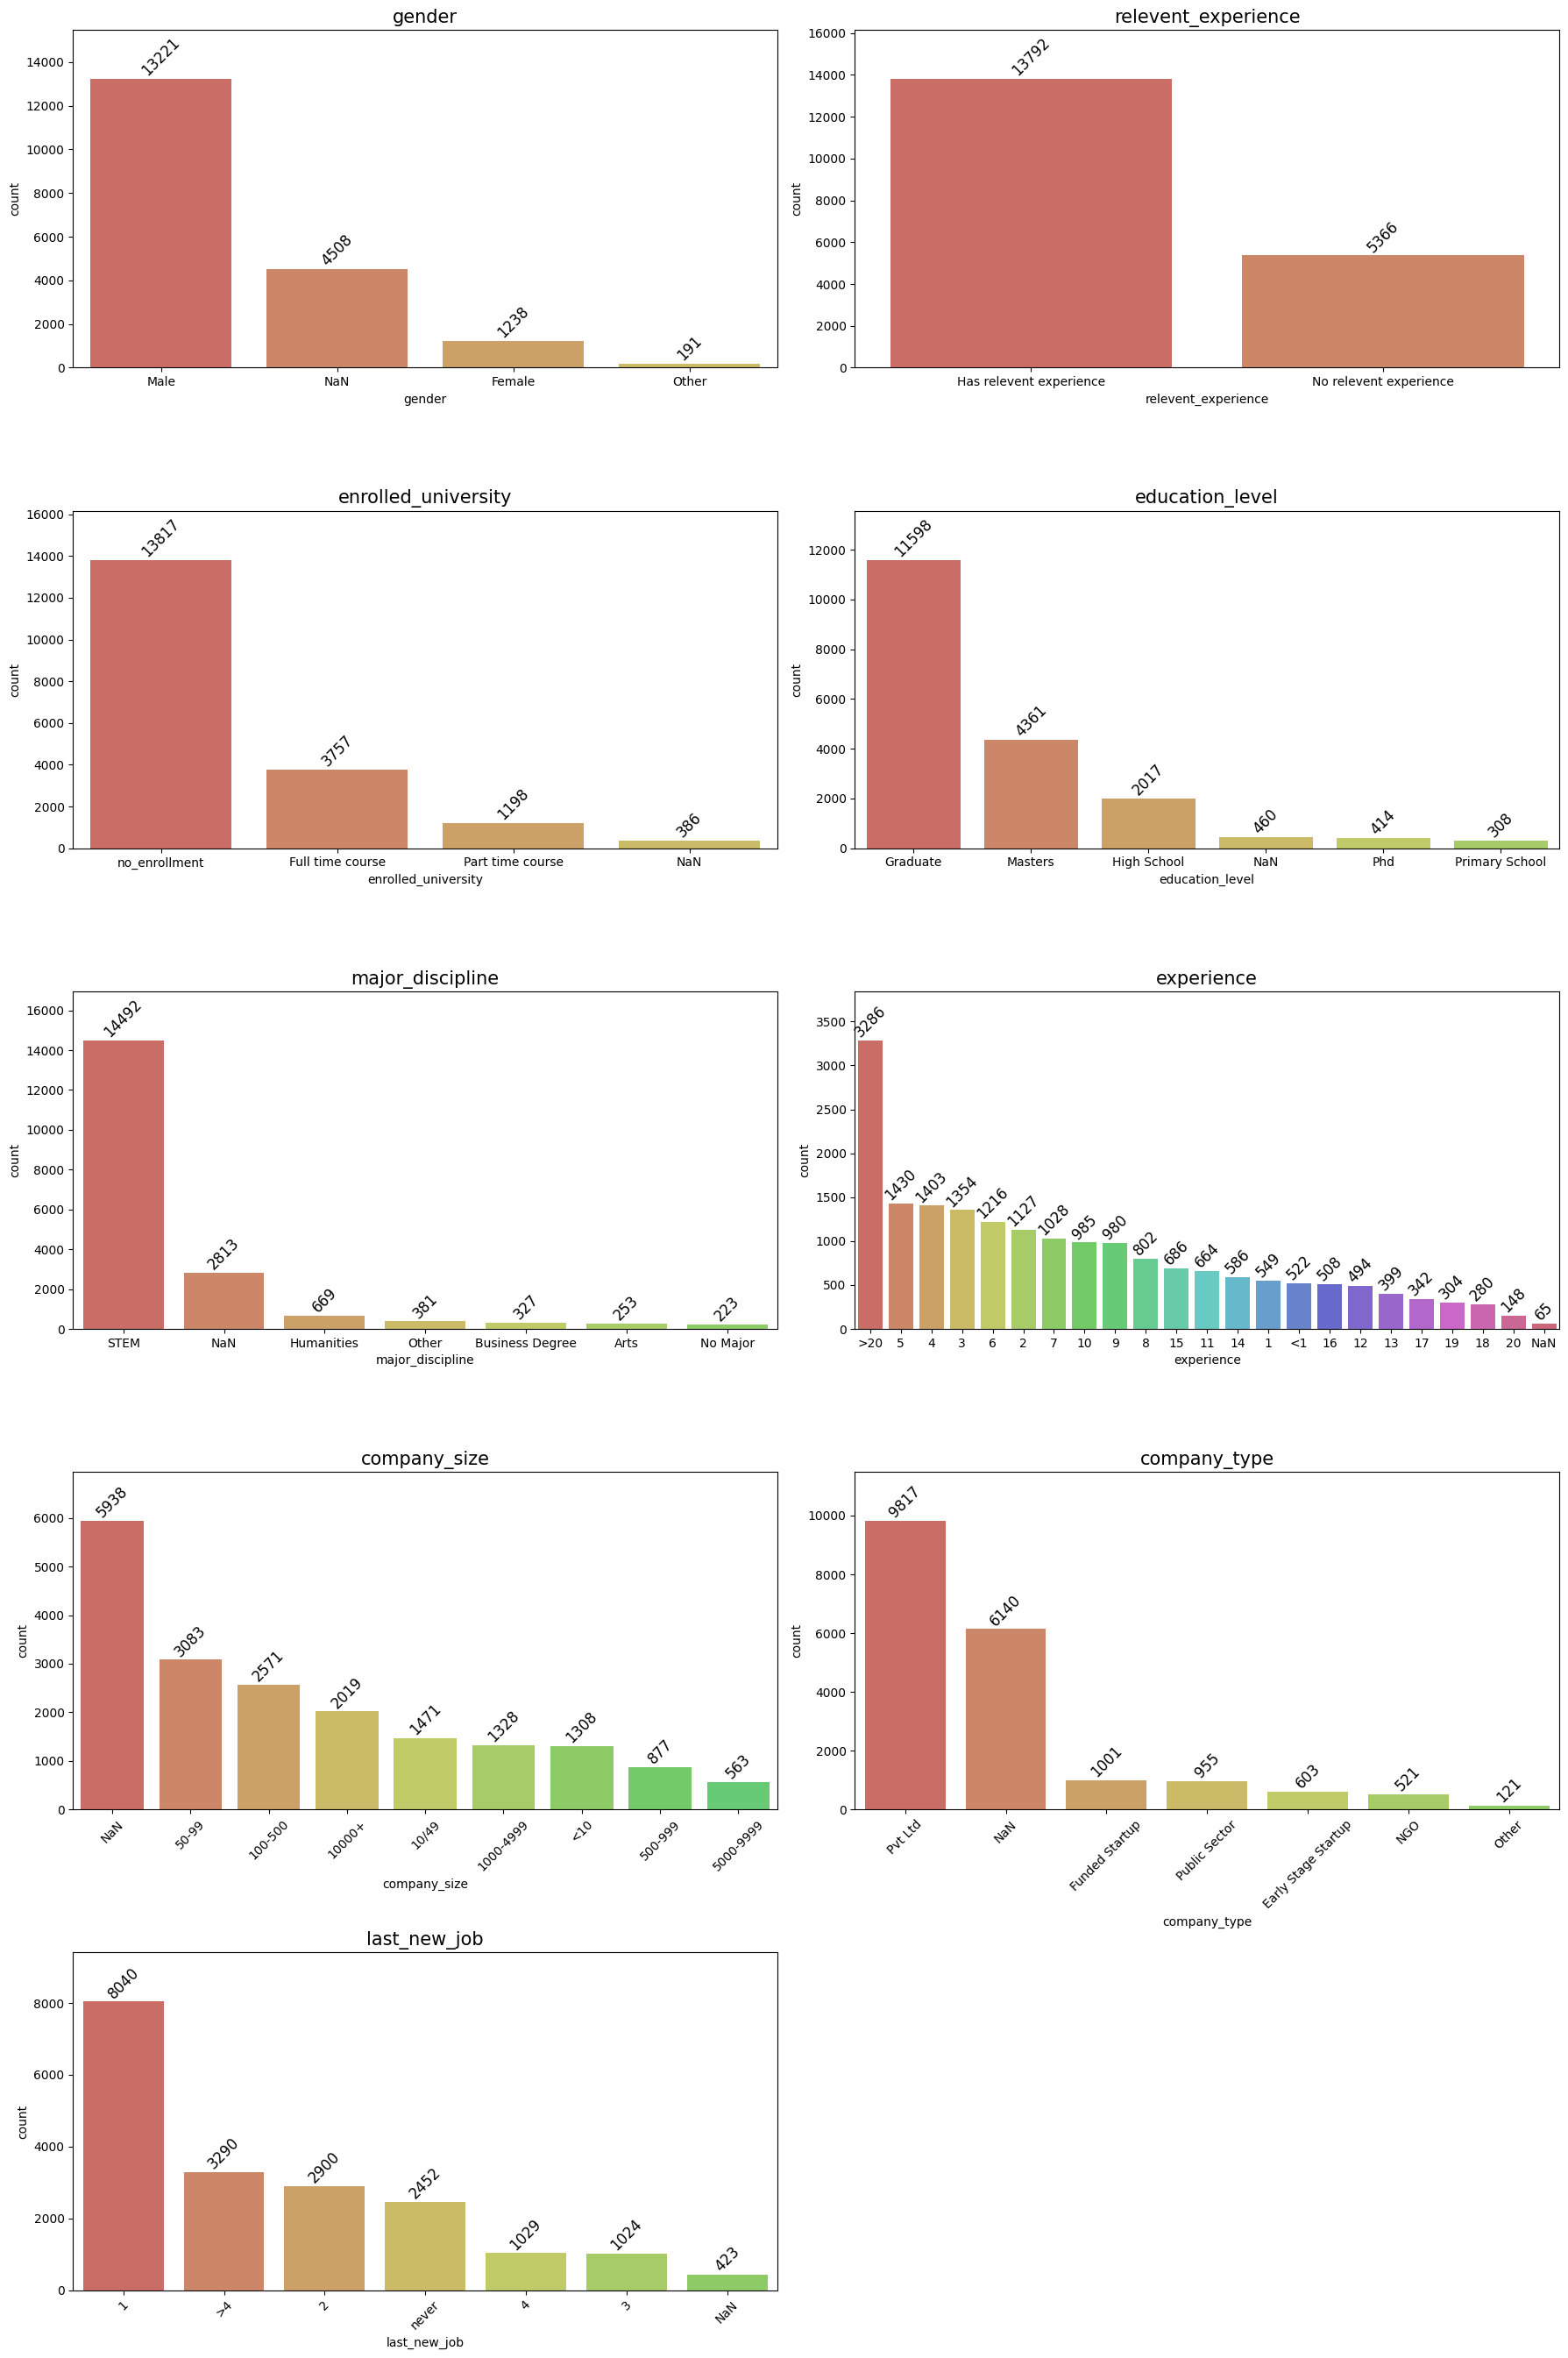

In [ ]:
# Dispay Distribution for Categorical Variables
plt.figure(figsize=(18,27))
column_list = list(JC_DS.columns.values) [3:12]
A = 0
for i in column_list:
    A+=1
    plt.subplot(5,2,A)
    sorted_data = JC_DS.fillna('NaN')[i].value_counts().sort_values(ascending=False)
    custom_palette = sns.color_palette("hls", 23)
    ax = sns.countplot(data=JC_DS.fillna('NaN'), x=i, order=sorted_data.index, palette=custom_palette)
    plt.title(i, fontsize=15)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom', color='black', size=12, rotation=45)
    if A >= 7:
        plt.xticks(rotation=45)
    max_count = sorted_data.max()
    plt.ylim(0, max_count + max_count*0.17)

plt.tight_layout(h_pad=2)
plt.show()

In [ ]:
# Display Count and Percentage Values
count_mis = JC_DS.isnull().sum()
perc_mis = count_mis * 100 / JC_DS.shape[0]
perc_mis_format = perc_mis.map("{:.2f}%".format)

MisV_Per = pd.DataFrame({'Count Missing': count_mis, 'Percent Missing': perc_mis_format})
MisV_Per

,Count Missing,Percent Missing
enrollee_id,0,0.00%
city,0,0.00%
city_development_index,0,0.00%
gender,4508,23.53%
relevent_experience,0,0.00%
enrolled_university,386,2.01%
education_level,460,2.40%
major_discipline,2813,14.68%
experience,65,0.34%
company_size,5938,30.99%


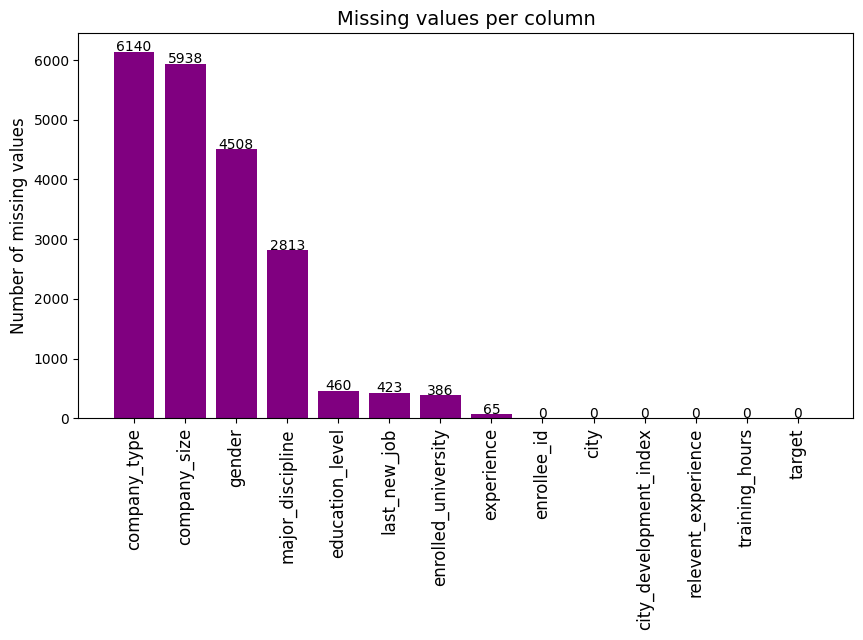

In [ ]:
# Visualize Missing Values
plt.figure(figsize=(10,5))
miss_Vs = JC_DS.isnull().sum().sort_values(ascending=False)
plt.bar(miss_Vs.index, miss_Vs, color='purple')
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Number of missing values', fontsize=12)
plt.title('Missing values per column', fontsize=14)
for i, v in enumerate(miss_Vs):
    plt.text(i, v+10, str(v), ha='center', fontsize=10)

plt.show()

<Axes: >

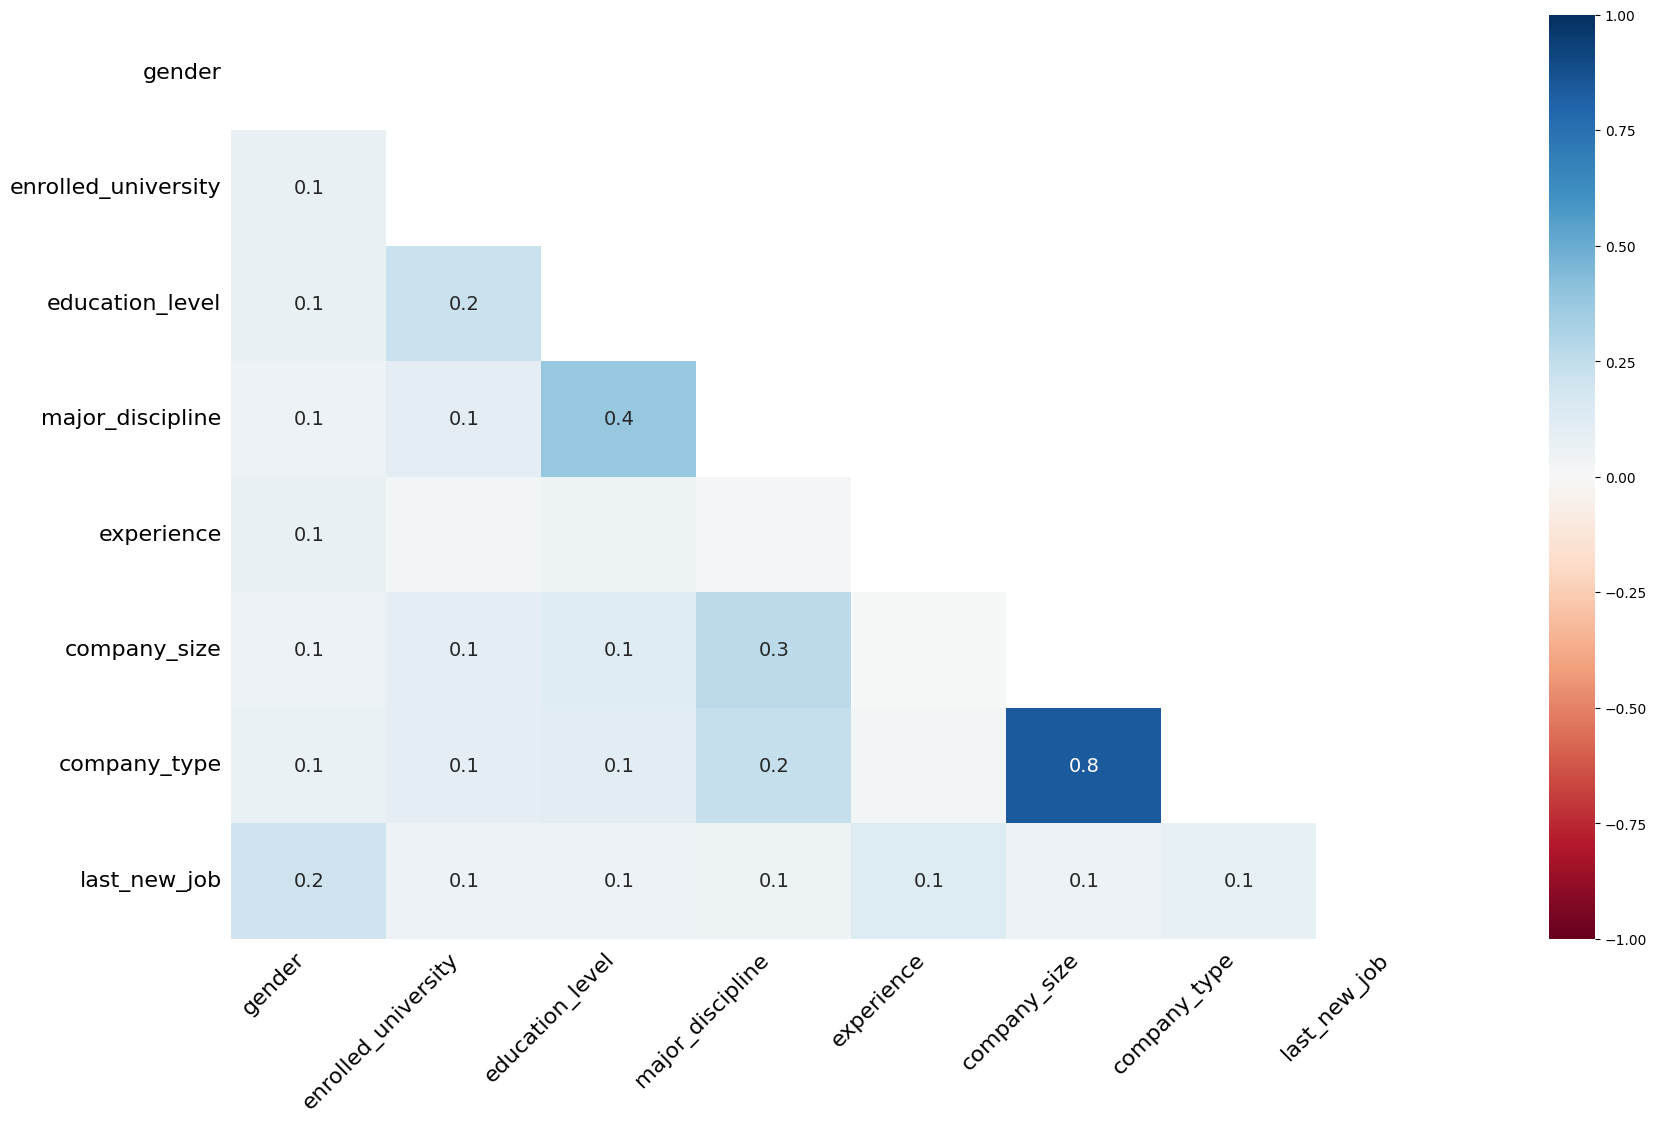

In [ ]:
# Display Nullity Correlation
msno.heatmap(JC_DS)

In [ ]:
# Detect Outlier
def detect_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return np.where((x > upper_bound) | (x < lower_bound))

In [ ]:
detect_outliers(JC_DS['city_development_index'])

(array([ 1523,  4744,  5010,  5265,  5567,  6127,  7724,  7864,  9134,
        10401, 13549, 14913, 15114, 16555, 16784, 17701, 18065]),)

In [ ]:
detect_outliers(JC_DS['training_hours'])

(array([   35,    69,    89,   110,   119,   133,   161,   164,   176,
          210,   217,   238,   247,   256,   278,   299,   317,   318,
          331,   353,   373,   382,   406,   410,   422,   477,   486,
          496,   507,   524,   528,   544,   619,   620,   630,   640,
          697,   705,   711,   730,   746,   757,   762,   842,   862,
          908,   933,   934,   990,  1043,  1105,  1108,  1145,  1171,
         1172,  1177,  1194,  1213,  1219,  1249,  1271,  1301,  1329,
         1330,  1331,  1380,  1420,  1452,  1494,  1509,  1512,  1547,
         1551,  1572,  1576,  1592,  1644,  1649,  1690,  1696,  1728,
         1761,  1776,  1812,  1814,  1816,  1826,  1832,  1838,  1850,
         1859,  1879,  1891,  1932,  2014,  2052,  2056,  2089,  2112,
         2156,  2167,  2185,  2207,  2241,  2242,  2260,  2265,  2275,
         2316,  2319,  2335,  2363,  2395,  2412,  2421,  2463,  2479,
         2489,  2501,  2512,  2518,  2519,  2523,  2608,  2610,  2612,
      

In [ ]:
detect_outliers(JC_DS['target'])

(array([    0,     3,     5, ..., 19149, 19153, 19154]),)

In [ ]:
detect_outliers(JC_DS['enrollee_id'])

(array([], dtype=int64),)

In [ ]:
categorical_cols     = []
non_categorical_cols = []

for column in JC_DS.columns:
    if JC_DS[column].dtype == "O": categorical_cols.append(column)
    else                            : non_categorical_cols.append(column)

In [ ]:
# Visualize Outlier
def box_plot(columns):

    fig = make_subplots(rows=1, cols=len(columns))
    for i, col in enumerate(columns):
        box_trace = go.Box(y=JC_DS[col], name=col )
        fig.add_trace(box_trace, row=1, col=i+1)
        fig.update_xaxes(title_text=col, row=1, col=i+1)
    fig.update_layout(title='Box Plots', height=600, width=250*len(columns))
    fig.update_yaxes(title_text='Values')
    return fig.show()

In [ ]:
box_plot(non_categorical_cols)

In [ ]:
c = Counter(JC_DS['target'])
not_job_change, job_change = c[0], c[1]
n_rows = len(JC_DS.index)
print("Total number of rows:", n_rows)
print('not_job_change: {} = {:.3%}'.format(not_job_change, not_job_change/n_rows))
print('job_change: {} = {:.3%}'.format(job_change, job_change/n_rows))

print('\nDataset is imbalanced')



Total number of rows: 19158
not_job_change: 14381 = 75.065%
job_change: 4777 = 24.935%

Dataset is imbalanced


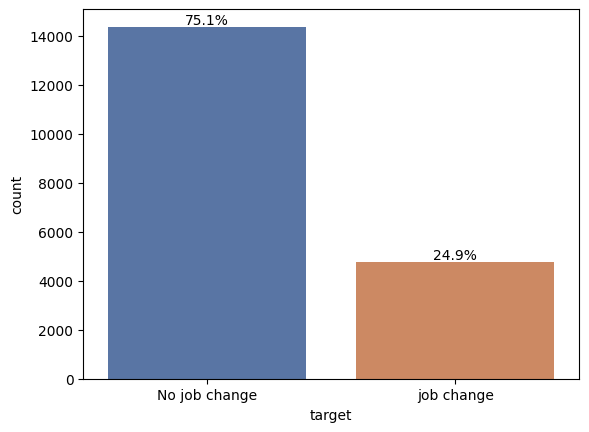

In [ ]:
# Visualize the Proportion Balance of the Data
ax = sns.countplot(x = JC_DS['target'], palette='deep')
total = len(JC_DS['target'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
ax.set_xticks(ticks=[0.0,1.0])
ax.set_xticklabels(labels=['No job change', 'job change'])
plt.show()

In [ ]:
# Distribution of Numerical Column with Target(city development index)
def hist_plot(columns):
  fig = make_subplots(rows=len(columns), cols=1, subplot_titles=columns)
  for i, col in enumerate(columns):
    for target in JC_DS['target'].unique():
      hist_trace = go.Histogram( x = JC_DS[JC_DS['target'] == target][col], nbinsx = 20 , name = target, marker_color = 'blue'
      if target == 0 else 'orange', hovertemplate= 'Target: '+ str(target) +'<br>Count: %{y}<extra></extra>' )
      fig.add_trace(hist_trace, row=i+1, col=1, )
      fig.update_layout(height=500*len(columns), showlegend=False, barmode='stack')
      fig.show()
hist_plot(['city_development_index'])

In [ ]:
# Distribution of Numerical Column with Target(training_hours)
hist_plot(['training_hours'])

In [ ]:
# Distribution of City Column with Target
hist_plot(['city'])

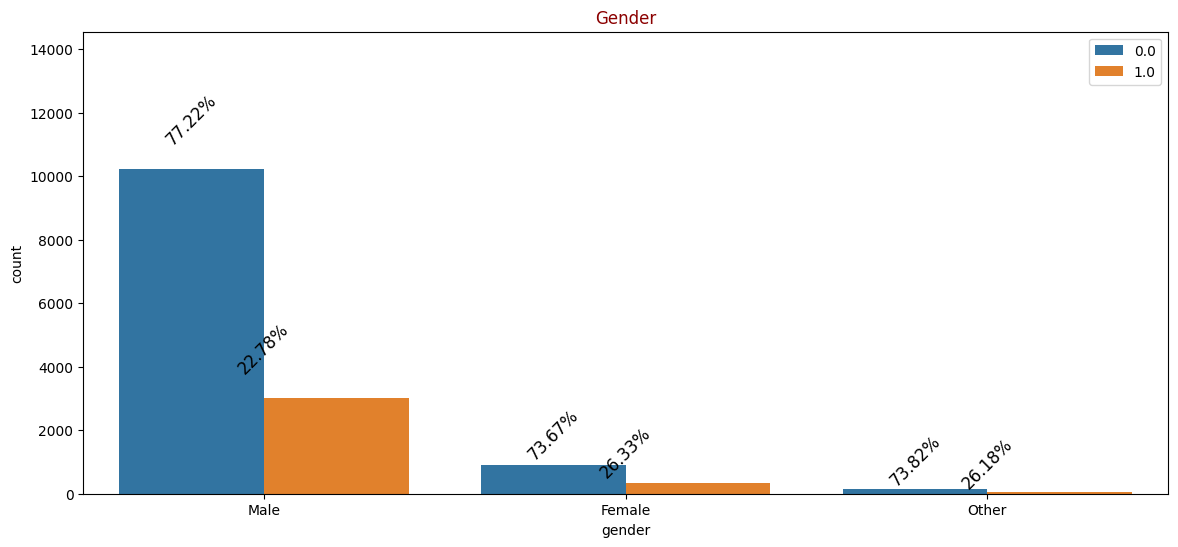

In [ ]:
# Gender with Target
type_Gen = JC_DS["gender"].value_counts()
plt.figure(figsize=(14,6))
sns.countplot(x="gender", hue="target", data=JC_DS)
plt.title("Gender", color="darkred")
plt.legend()
for i in range(len(type_Gen)):
    for j in range(len(JC_DS["target"].unique())):
        plt.text(i+j*0.2-0.2, JC_DS[JC_DS["gender"]==type_Gen.index[i]]["target"].value_counts()[j]+type_Gen[i]/20, str(round(JC_DS[JC_DS["gender"]==type_Gen.index[i]]["target"].value_counts(normalize=True)[j]*100, 2))+"%", ha='center', va='bottom', fontsize=12, rotation=45)
plt.ylim(0, max(type_Gen)+max(type_Gen)/10)
plt.show()

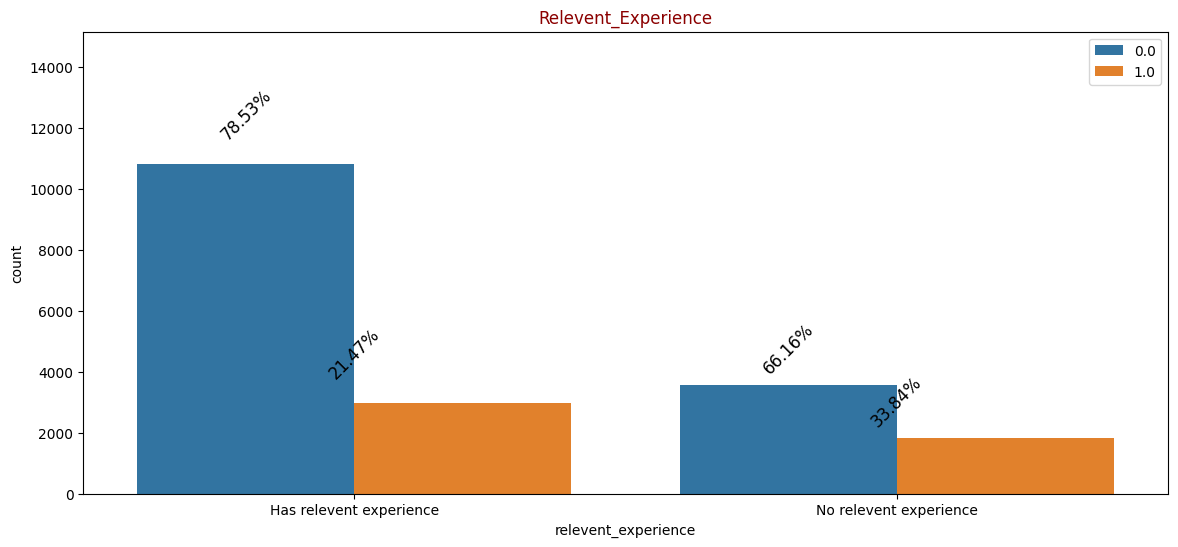

In [ ]:
# Relevent Experience with target
Rel_Exp = JC_DS["relevent_experience"].value_counts()
plt.figure(figsize=(14,6))
sns.countplot(x="relevent_experience", hue="target", data=JC_DS)
plt.title("Relevent_Experience", color="darkred")
plt.legend()
for i in range(len(Rel_Exp)):
    for j in range(len(JC_DS["target"].unique())):
        plt.text(i+j*0.2-0.2, JC_DS[JC_DS["relevent_experience"]==Rel_Exp.index[i]]["target"].value_counts()[j]+Rel_Exp[i]/20, str(round(JC_DS[JC_DS["relevent_experience"]==Rel_Exp.index[i]]["target"].value_counts(normalize=True)[j]*100, 2))+"%", ha='center', va='bottom', fontsize=12, rotation=45)
plt.ylim(0, max(Rel_Exp)+max(Rel_Exp)/10)
plt.show()

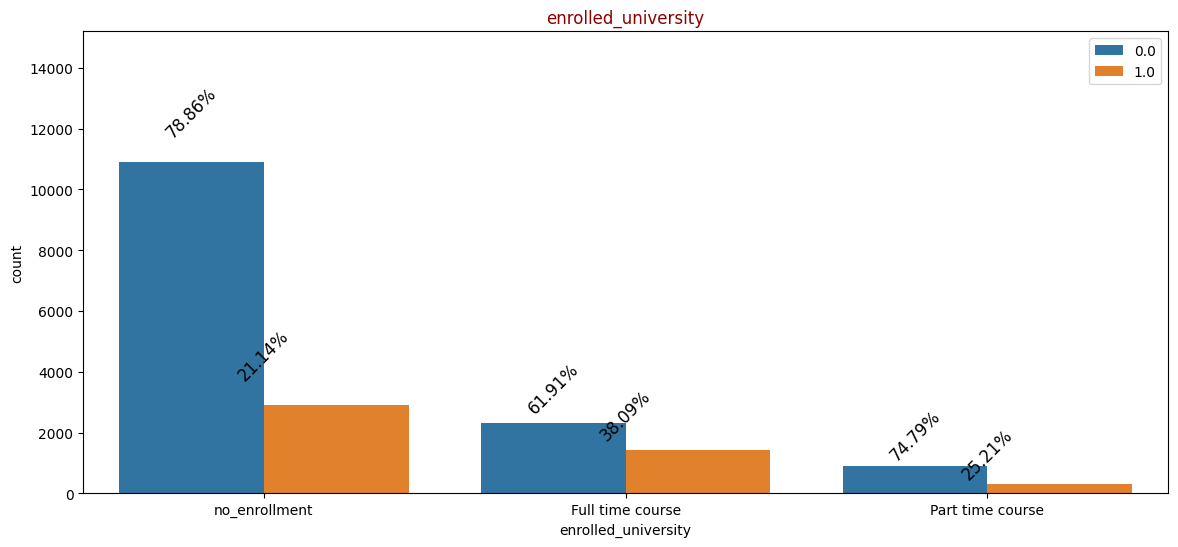

In [ ]:
# Enrolled University with target
enroll_status = JC_DS["enrolled_university"].value_counts()
plt.figure(figsize=(14,6))
sns.countplot(x="enrolled_university", hue="target", data=JC_DS)
plt.title("enrolled_university", color="darkred")
plt.legend()
for i in range(len(enroll_status)):
    for j in range(len(JC_DS["target"].unique())):
        plt.text(i+j*0.2-0.2, JC_DS[JC_DS["enrolled_university"]==enroll_status.index[i]]["target"].value_counts()[j]+enroll_status[i]/20, str(round(JC_DS[JC_DS["enrolled_university"]==enroll_status.index[i]]["target"].value_counts(normalize=True)[j]*100, 2))+"%", ha='center', va='bottom', fontsize=12, rotation=45)
plt.ylim(0, max(enroll_status)+max(enroll_status)/10)
plt.show()

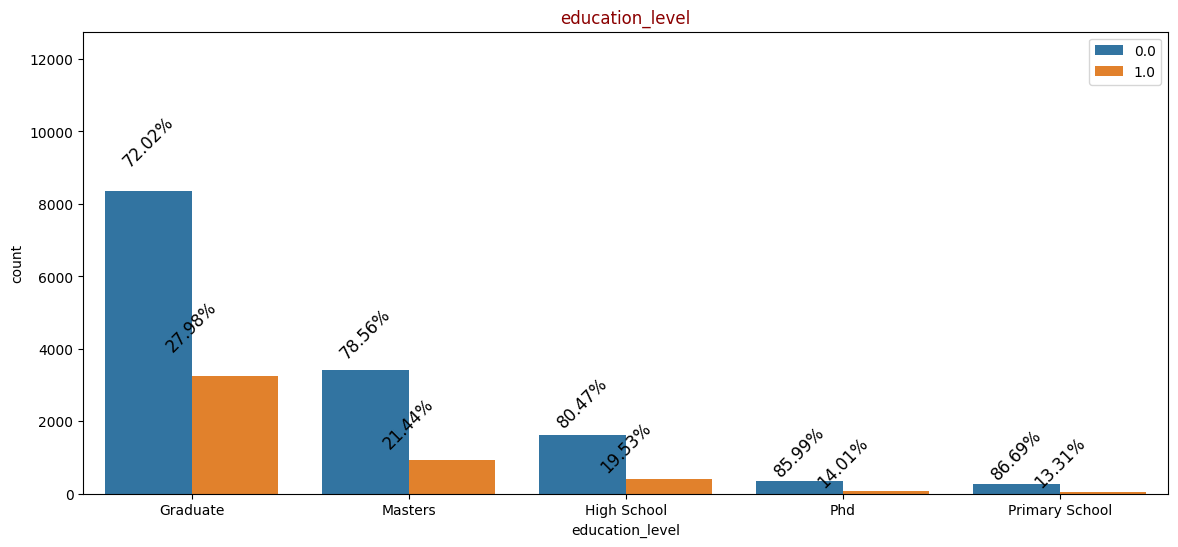

In [ ]:
# Education Level with target
edu_level = JC_DS["education_level"].value_counts()
plt.figure(figsize=(14,6))
sns.countplot(x="education_level", hue="target", data=JC_DS)
plt.title("education_level", color="darkred")
plt.legend()
for i in range(len(edu_level)):
    for j in range(len(JC_DS["target"].unique())):
        plt.text(i+j*0.2-0.2, JC_DS[JC_DS["education_level"]==edu_level.index[i]]["target"].value_counts()[j]+edu_level[i]/20, str(round(JC_DS[JC_DS["education_level"]==edu_level.index[i]]["target"].value_counts(normalize=True)[j]*100, 2))+"%", ha='center', va='bottom', fontsize=12, rotation=45)
plt.ylim(0, max(edu_level)+max(edu_level)/10)
plt.show()

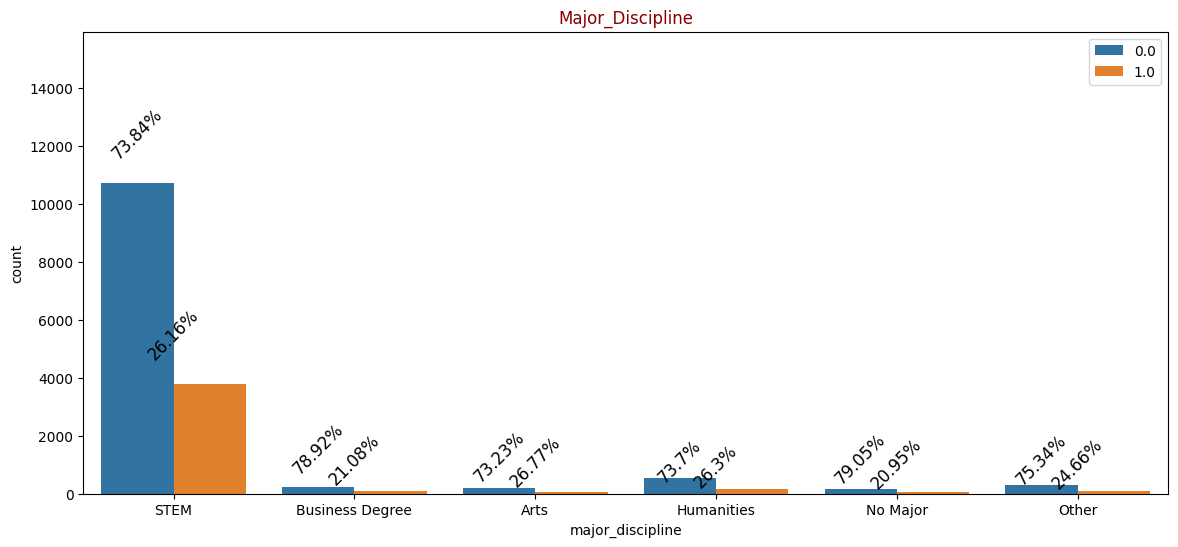

In [ ]:
# Major Discipline with target
Spec_Field = JC_DS["major_discipline"].value_counts()
plt.figure(figsize=(14,6))
sns.countplot(x="major_discipline", hue="target", data=JC_DS)
plt.title("Major_Discipline", color="darkred")
plt.legend()
for i in range(len(Spec_Field)):
    for j in range(len(JC_DS["target"].unique())):
        plt.text(i+j*0.2-0.2, JC_DS[JC_DS["major_discipline"]==Spec_Field.index[i]]["target"].value_counts()[j]+Spec_Field[i]/20, str(round(JC_DS[JC_DS["major_discipline"]==Spec_Field.index[i]]["target"].value_counts(normalize=True)[j]*100, 2))+"%", ha='center', va='bottom', fontsize=12, rotation=45)
plt.ylim(0, max(Spec_Field)+max(Spec_Field)/10)
plt.show()

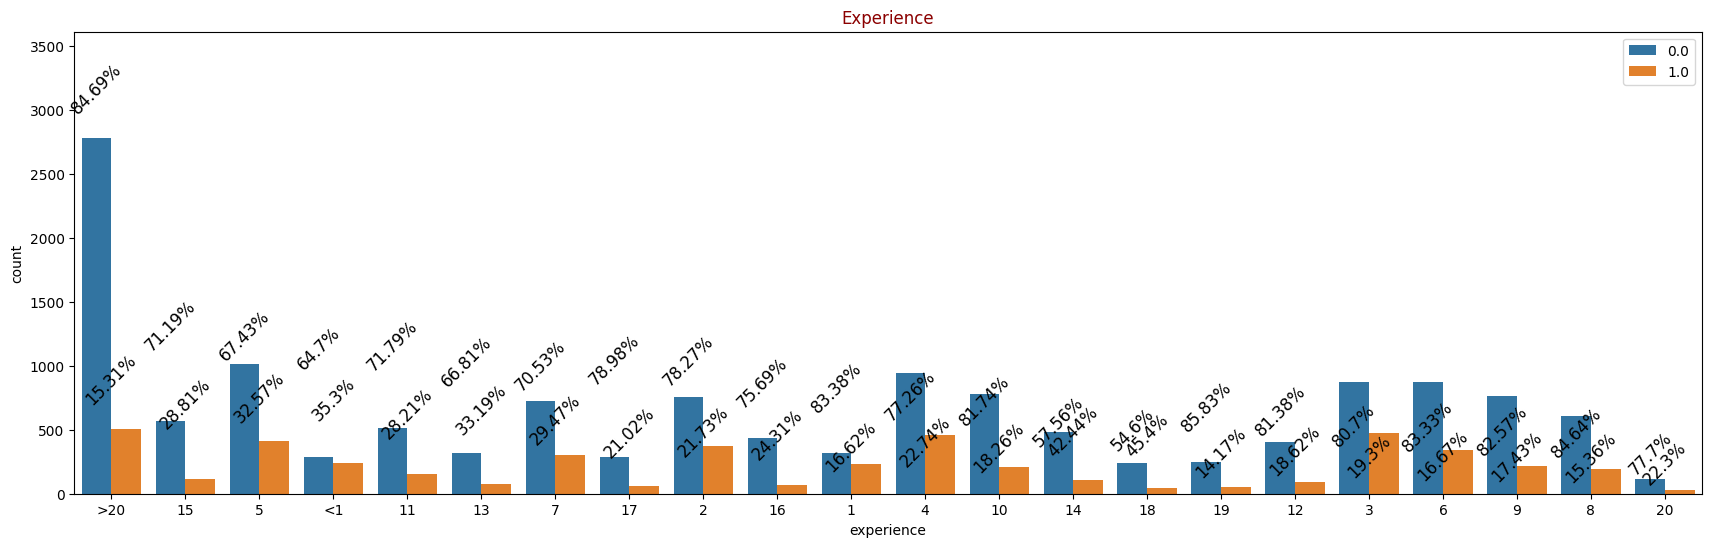

In [ ]:
# Experience with target
exp = JC_DS["experience"].value_counts()
plt.figure(figsize=(21,6))
sns.countplot(x="experience", hue="target", data=JC_DS)
plt.title("Experience", color="darkred")
plt.legend()
for i in range(len(exp)):
    for j in range(len(JC_DS["target"].unique())):
        plt.text(i+j*0.2-0.2, JC_DS[JC_DS["experience"]==exp.index[i]]["target"].value_counts()[j]+exp[i]/20, str(round(JC_DS[JC_DS["experience"]==exp.index[i]]["target"].value_counts(normalize=True)[j]*100, 2))+"%", ha='center', va='bottom', fontsize=12, rotation=45)
plt.ylim(0, max(exp)+max(exp)/10)
plt.show()

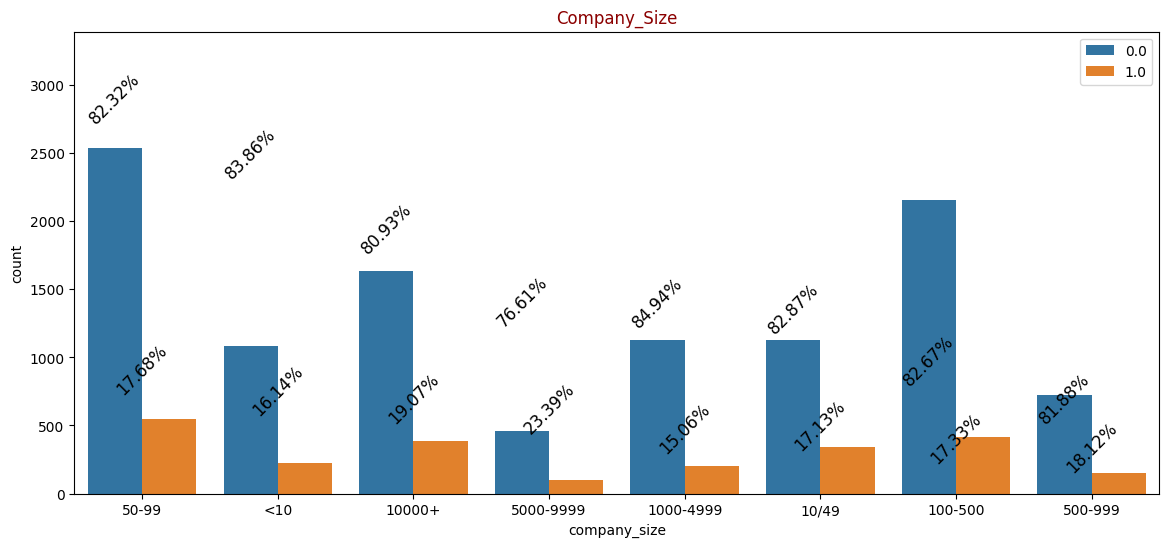

In [ ]:
# Company Size with target
comp_size = JC_DS["company_size"].value_counts()
plt.figure(figsize=(14,6))
sns.countplot(x="company_size", hue="target", data=JC_DS)
plt.title("Company_Size", color="darkred")
plt.legend()
for i in range(len(comp_size)):
    for j in range(len(JC_DS["target"].unique())):
        plt.text(i+j*0.2-0.2, JC_DS[JC_DS["company_size"]==comp_size.index[i]]["target"].value_counts()[j]+comp_size[i]/20, str(round(JC_DS[JC_DS["company_size"]==comp_size.index[i]]["target"].value_counts(normalize=True)[j]*100, 2))+"%", ha='center', va='bottom', fontsize=12, rotation=45)
plt.ylim(0, max(comp_size)+max(comp_size)/10)
plt.show()

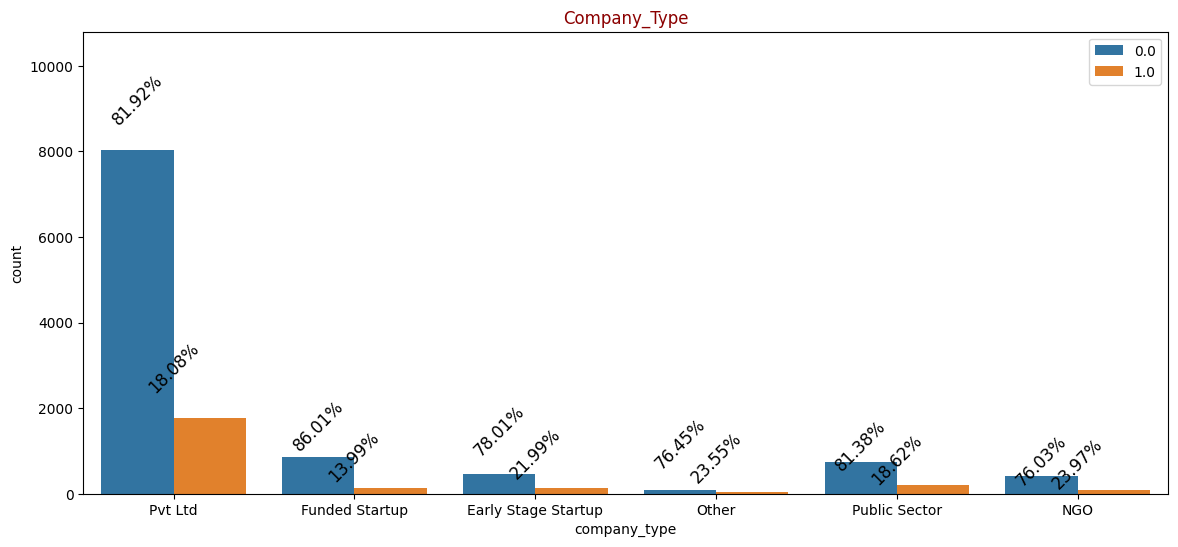

In [ ]:
# Company Type with target
comp_type = JC_DS["company_type"].value_counts()
plt.figure(figsize=(14,6))
sns.countplot(x="company_type", hue="target", data=JC_DS)
plt.title("Company_Type", color="darkred")
plt.legend()
for i in range(len(comp_type)):
    for j in range(len(JC_DS["target"].unique())):
        plt.text(i+j*0.2-0.2, JC_DS[JC_DS["company_type"]==comp_type.index[i]]["target"].value_counts()[j]+comp_type[i]/20, str(round(JC_DS[JC_DS["company_type"]==comp_type.index[i]]["target"].value_counts(normalize=True)[j]*100, 2))+"%", ha='center', va='bottom', fontsize=12, rotation=45)
plt.ylim(0, max(comp_type)+max(comp_type)/10)
plt.show()

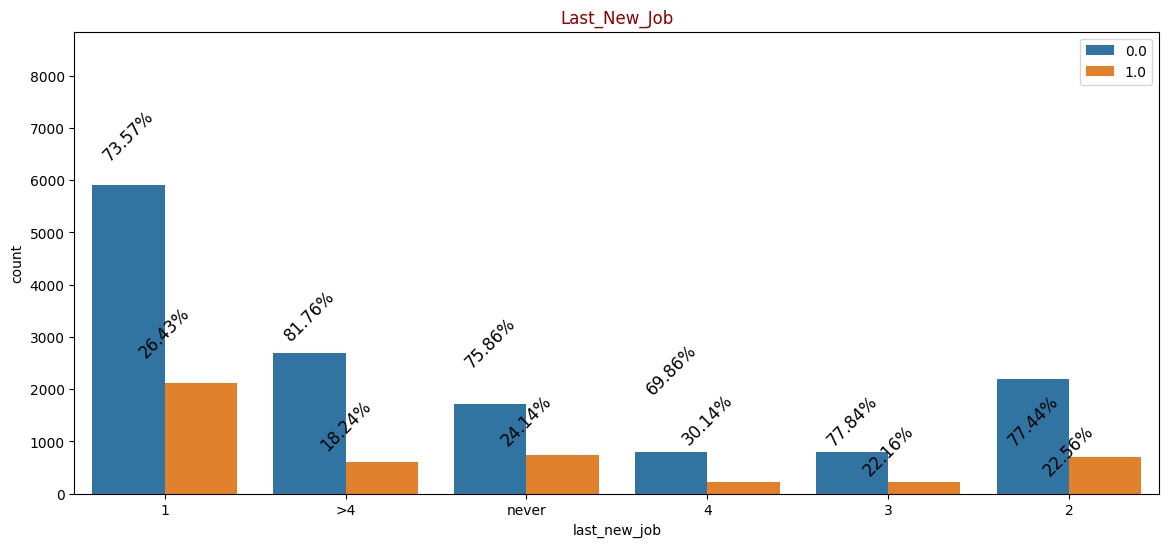

In [ ]:
# Last New Gob with target
last_jobN = JC_DS["last_new_job"].value_counts()
plt.figure(figsize=(14,6))
sns.countplot(x="last_new_job", hue="target", data=JC_DS)
plt.title("Last_New_Job", color="darkred")
plt.legend()
for i in range(len(last_jobN)):
    for j in range(len(JC_DS["target"].unique())):
        plt.text(i+j*0.2-0.2, JC_DS[JC_DS["last_new_job"]==last_jobN.index[i]]["target"].value_counts()[j]+last_jobN[i]/20, str(round(JC_DS[JC_DS["last_new_job"]==last_jobN.index[i]]["target"].value_counts(normalize=True)[j]*100, 2))+"%", ha='center', va='bottom', fontsize=12, rotation=45)
plt.ylim(0, max(last_jobN)+max(last_jobN)/10)
plt.show()


There are 1,471  entries have the value 10/49  this value is not a valid number and is considered a missing value

In [ ]:
# Data Correction
JC_DS['company_size'] = JC_DS['company_size'].replace('10/49', np.nan)
JC_DS['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [ ]:
# Data Encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
df_cat_cols = JC_DS[['city', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job']]
transf_cat_num = LabelEncoder()
df_num_CatCol = df_cat_cols.astype("str").apply(transf_cat_num.fit_transform)
df_enc_OnlyStr = df_num_CatCol.where(~df_cat_cols.isna(), df_cat_cols)
JC_DS.drop(['city', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job'],axis=1,inplace=True)

JC_DS_num = df_enc_OnlyStr.join(JC_DS)
JC_DS_num.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,enrollee_id,city_development_index,training_hours,target
0,5,1,0,3,0,5,21,NaN,NaN,0,8949,0.920,36,1.0
1,77,1,1,3,0,5,6,3,5,4,29725,0.776,47,0.0
2,64,NaN,1,0,0,5,15,NaN,NaN,6,11561,0.624,83,0.0
3,14,NaN,1,NaN,0,1,20,NaN,5,6,33241,0.789,52,1.0
4,50,1,0,3,2,5,21,3,1,3,666,0.767,8,0.0


In [ ]:
# Info after Encoding
JC_DS_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  int64  
 1   gender                  14650 non-null  object 
 2   relevent_experience     19158 non-null  int64  
 3   enrolled_university     18772 non-null  object 
 4   education_level         18698 non-null  object 
 5   major_discipline        16345 non-null  object 
 6   experience              19093 non-null  object 
 7   company_size            11749 non-null  object 
 8   company_type            13018 non-null  object 
 9   last_new_job            18735 non-null  object 
 10  enrollee_id             19158 non-null  int64  
 11  city_development_index  19158 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(4), object(8)
mem

In [ ]:
JC_DS_num['major_discipline'].value_counts()

5    14492
2      669
4      381
1      327
0      253
3      223
Name: major_discipline, dtype: int64

0.4699999999999999 1.1900000000000002
-74.5 185.5


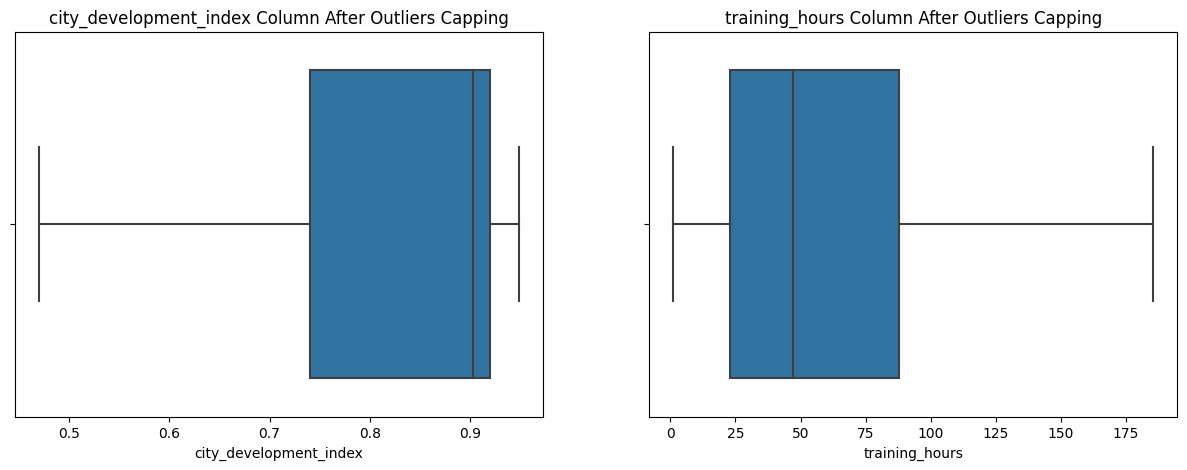

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Handling Outlier
plt.figure(figsize=(15,5)z)
column_list = list(JC_DS_num.columns.values) [11:13]
A = 0
for i in column_list:
    A+=1
    plt.subplot(1,2,A)
    Q25 = JC_DS_num[i].quantile(0.25)
    Q75 = JC_DS_num[i].quantile(0.75)
    IQR = Q75-Q25 # calculate outlier cutoff
    cut_off = IQR * 1.5
    lower = Q25 - cut_off
    upper = Q75 + cut_off
    print(lower, upper)
    JC_DS_num[i] = np.clip(JC_DS_num[i], lower, upper)
    sns.boxplot(x=JC_DS_num[i]); plt.title(i + " Column After Outliers Capping");
plt.show()

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
# Handling Missing Value
lr = LinearRegression()
impute_Mv = IterativeImputer(random_state=42, estimator=lr,
                                max_iter=11, n_nearest_features=2, imputation_order = 'roman')
JC_DS_No_Mv_np = impute_Mv.fit_transform(JC_DS_num)

JC_DS_No_OMv = pd.DataFrame(JC_DS_No_Mv_np)
print(JC_DS_No_OMv.shape)
JC_DS_No_OMv.columns = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level',
                    'major_discipline','experience', 'company_size', 'company_type',
                    'last_new_job', 'enrollee_id', 'city_development_index', 'training_hours','target']

JC_DS_No_OMv.shape

(19158, 14)


(19158, 14)

In [ ]:
# Display Data without Missing Value
JC_DS_No_OMv.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,enrollee_id,city_development_index,training_hours,target
0,5.0,1.000000,0.0,3.00000,0.0,5.0,21.0,2.402071,4.282745,0.0,8949.0,0.920,36.0,1.0
1,77.0,1.000000,1.0,3.00000,0.0,5.0,6.0,3.000000,5.000000,4.0,29725.0,0.776,47.0,0.0
2,64.0,0.948118,1.0,0.00000,0.0,5.0,15.0,2.651706,4.098252,6.0,11561.0,0.624,83.0,0.0
3,14.0,0.953693,1.0,1.94833,0.0,1.0,20.0,2.564005,5.000000,6.0,33241.0,0.789,52.0,1.0
4,50.0,1.000000,0.0,3.00000,2.0,5.0,21.0,3.000000,1.000000,3.0,666.0,0.767,8.0,0.0


In [ ]:
# Info after Missing Value
JC_DS_No_OMv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  float64
 1   gender                  19158 non-null  float64
 2   relevent_experience     19158 non-null  float64
 3   enrolled_university     19158 non-null  float64
 4   education_level         19158 non-null  float64
 5   major_discipline        19158 non-null  float64
 6   experience              19158 non-null  float64
 7   company_size            19158 non-null  float64
 8   company_type            19158 non-null  float64
 9   last_new_job            19158 non-null  float64
 10  enrollee_id             19158 non-null  float64
 11  city_development_index  19158 non-null  float64
 12  training_hours          19158 non-null  float64
 13  target                  19158 non-null  float64
dtypes: float64(14)
memory usage: 2.0 MB


In [ ]:
JC_DS_No_OMv.isna().sum()

city                      0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
enrollee_id               0
city_development_index    0
training_hours            0
target                    0
dtype: int64

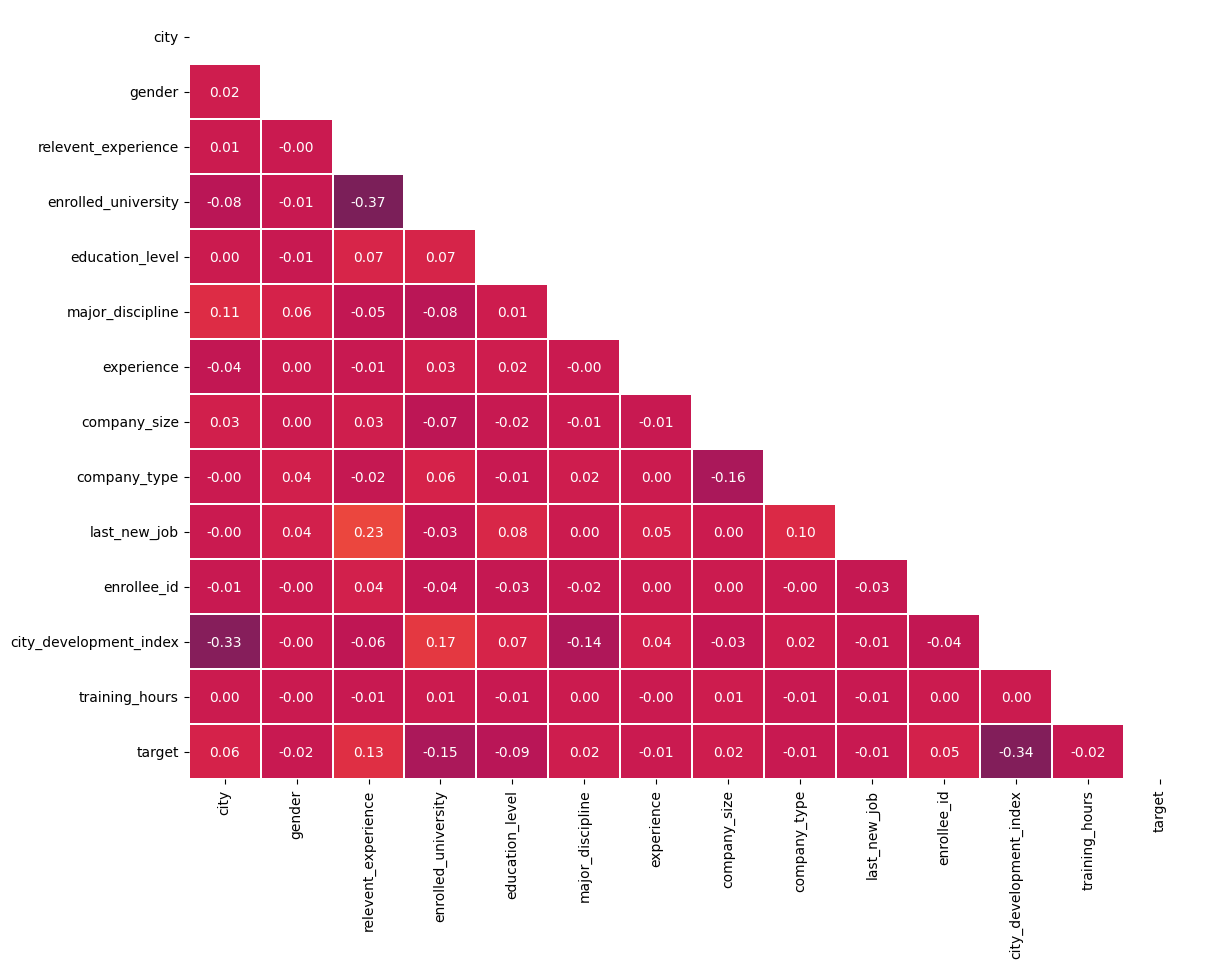

In [ ]:
import seaborn as sns
import numpy as np
# Display Correlation
matrix = np.triu(JC_DS_No_OMv.corr())
plt.figure(figsize=(13, 10))
sns.heatmap(JC_DS_No_OMv.corr(), annot = True, fmt=".2f", mask = matrix,
            vmin = -1, vmax = 1, linewidths = 0.1, linecolor = 'white', cbar = False)
plt.show()
#corrMatrix = data.corr()
#sns.heatmap(corrMatrix, annot=True)
#plt.show()


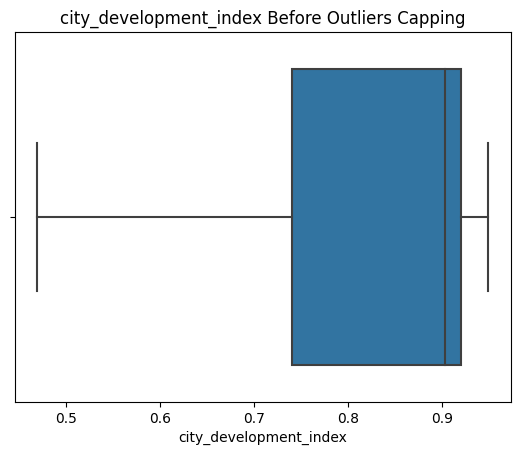

In [ ]:
sns.boxplot(x=JC_DS_No_OMv["city_development_index"]);
plt.title("city_development_index Before Outliers Capping");

In [ ]:
JC_DS_Ms = JC_DS_No_OMv.copy()

In [ ]:
# Drop Columns
X = JC_DS_Ms.drop(['enrollee_id', 'target'], axis = 1)
JC_DS_Ms.shape
y = JC_DS_Ms['target'].values

In [ ]:
# Split Data train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)
print(X_train.shape)
print(X_test.shape)

(13410, 12)
(5748, 12)


Original dataset shape Counter({0.0: 10066, 1.0: 3344}) - Total Rows: 13410
Resampled dataset shape Counter({0.0: 10066, 1.0: 7046}) - Total Rows: 17112


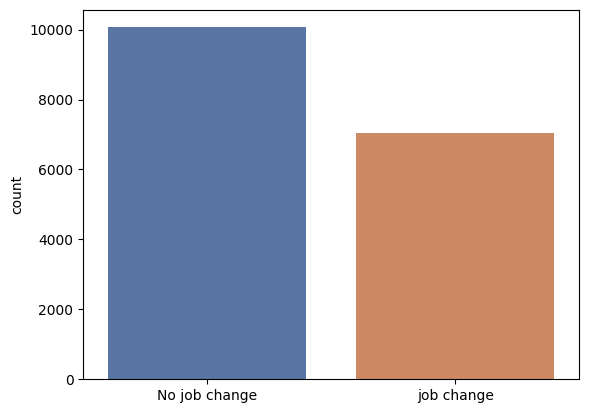

In [ ]:
from imblearn.over_sampling import SMOTE
# Handle Imbalance Data
print('Original dataset shape %s' % Counter(y_train), '- Total Rows:', len(y_train))
smote = SMOTE(sampling_strategy = 0.7)

X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_smote), '- Total Rows:', len(y_smote))No job change

ax = sns.countplot(x = y_smote, palette='deep');
ax.set_xticks(ticks=[0,1]);
ax.set_xticklabels(labels=['No job change', 'job change']);

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Feature Selection
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_smote, y_smote);

city_development_index    0.163403
training_hours            0.130699
company_type              0.127222
company_size              0.096436
experience                0.090296
city                      0.083795
relevent_experience       0.057340
last_new_job              0.056459
gender                    0.055304
education_level           0.052012
major_discipline          0.044181
enrolled_university       0.042851
dtype: float64


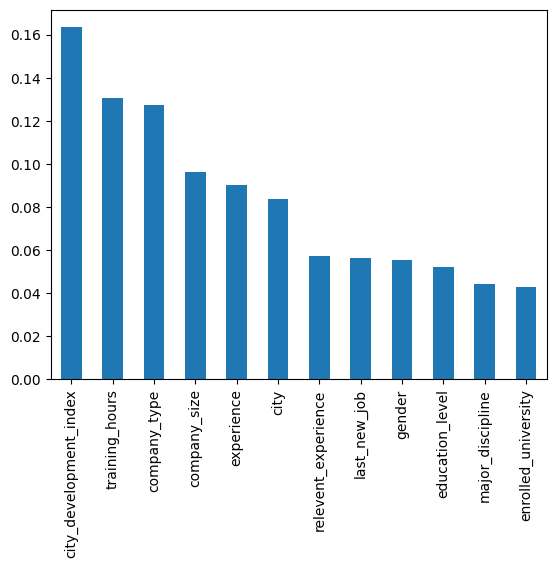

In [ ]:
importance = pd.Series(rf_model.feature_importances_, index=X_smote.columns)
print(importance.sort_values(ascending=False))
importance.nlargest(12).plot(kind='bar');

In [ ]:
sorted_features = importance.sort_values(ascending=False).index
sorted_features

Index(['city_development_index', 'training_hours', 'company_type',
       'company_size', 'experience', 'city', 'relevent_experience',
       'last_new_job', 'gender', 'education_level', 'major_discipline',
       'enrolled_university'],
      dtype='object')

In [ ]:
# keeping the important features and dropping the rest

# Action Feature Selection into Data
z = 7

X_train_filtered = X_smote[sorted_features[0:z]]
X_test_filtered = X_test[sorted_features[0:z]]

In [ ]:
 -

SVM

In [ ]:
from sklearn import svm
# SVM model
svm_model = svm.SVC(kernel="linear", C=0.8, class_weight= "balanced", random_state = 0)
svm_model.fit(X_train_scaled, y_smote);

In [ ]:
svm_y_pred = svm_model.predict(X_test_scaled)

              precision    recall  f1-score   support

         0.0       0.84      0.79      0.82      4315
         1.0       0.47      0.55      0.50      1433

    accuracy                           0.73      5748
   macro avg       0.65      0.67      0.66      5748
weighted avg       0.75      0.73      0.74      5748



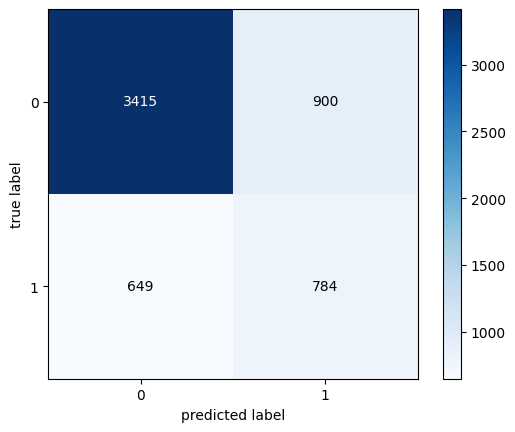

In [ ]:
print(metrics.classification_report(y_test, svm_y_pred))
svm_smote_fscore = f1_score(y_test, svm_y_pred)
cm = metrics.confusion_matrix(y_test, svm_y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm, colorbar= True)
plt.show()

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled,y_smote);

In [ ]:
knn_y_pred = knn_model.predict(X_test_scaled)

              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81      4315
         1.0       0.45      0.52      0.48      1433

    accuracy                           0.72      5748
   macro avg       0.64      0.65      0.65      5748
weighted avg       0.74      0.72      0.73      5748



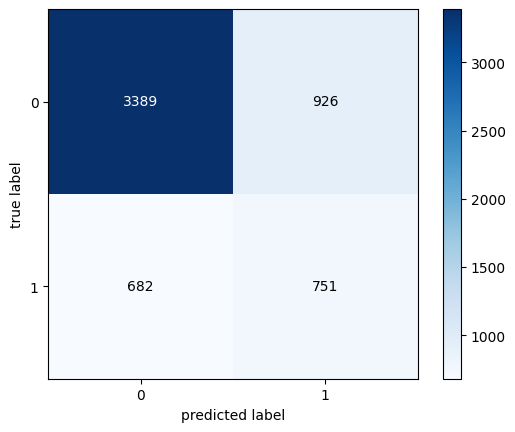

In [ ]:
print(metrics.classification_report(y_test,knn_y_pred))
knn_smote_fscore = f1_score(y_test, knn_y_pred)

cm2 = metrics.confusion_matrix(y_test, knn_y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm2, colorbar= True)
plt.show()

Random Forest

In [ ]:
# Random Forest
rf_smote_model = RandomForestClassifier(random_state = 0, n_estimators = 100)
rf_smote_model.fit(X_train_filtered, y_smote)

RandomForestClassifier(random_state=0)

In [ ]:
rf_smote_y_pred = rf_smote_model.predict(X_test_filtered)

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      4315
         1.0       0.59      0.52      0.56      1433

    accuracy                           0.79      5748
   macro avg       0.72      0.70      0.71      5748
weighted avg       0.78      0.79      0.79      5748

Random Forest F1 score: 0.5565862708719852


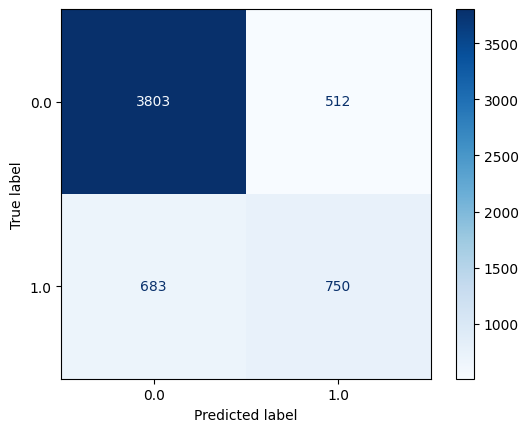

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, ConfusionMatrixDisplay

print(classification_report(y_test, rf_smote_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, rf_smote_y_pred, cmap='Blues')
plt.grid(False)

rf_smote_fscore = f1_score(y_test, rf_smote_y_pred)
print('Random Forest F1 score:', rf_smote_fscore)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree model
dt_smote_model = DecisionTreeClassifier(random_state=0, class_weight= "balanced")
dt_smote_model.fit(X_train_filtered, y_smote)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [ ]:
dt_smote_y_pred = dt_smote_model.predict(X_test_filtered)

              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82      4315
         1.0       0.47      0.51      0.49      1433

    accuracy                           0.73      5748
   macro avg       0.65      0.66      0.65      5748
weighted avg       0.74      0.73      0.74      5748

Decision Tree F1 score: 0.4886968085106383


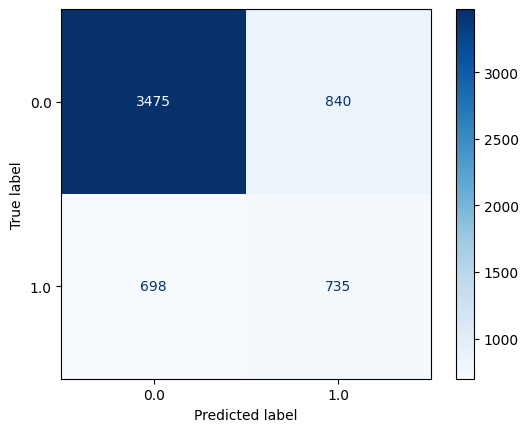

In [ ]:
print(classification_report(y_test, dt_smote_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, dt_smote_y_pred, cmap="Blues");
plt.grid(False)

dt_smote_fscore = f1_score(y_test, dt_smote_y_pred)
print('Decision Tree F1 score:', dt_smote_fscore)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression model
lr_smote_model = LogisticRegression(random_state=0, max_iter = 1000)
lr_smote_model.fit(X_train_filtered, y_smote)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
lr_smote_y_pred = lr_smote_model.predict(X_test_filtered)

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.83      4315
         1.0       0.50      0.52      0.51      1433

    accuracy                           0.75      5748
   macro avg       0.67      0.67      0.67      5748
weighted avg       0.75      0.75      0.75      5748



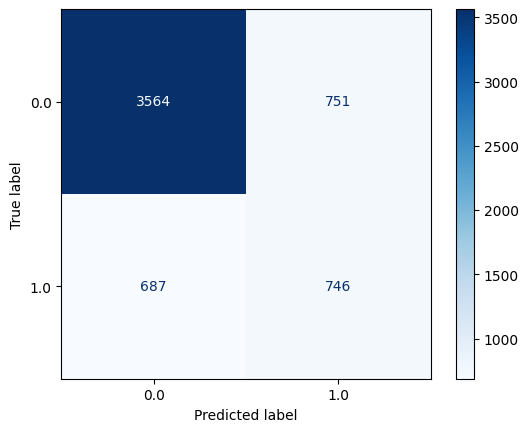

In [ ]:
print(classification_report(y_test, lr_smote_y_pred))
lr_smote_fscore = f1_score(y_test, lr_smote_y_pred)

ConfusionMatrixDisplay.from_predictions(y_test, lr_smote_y_pred, cmap='Blues');
plt.grid(False);

XGBoost

In [ ]:
from xgboost import XGBClassifier
# XGBoost model
xgb_smote_model = XGBClassifier(n_estimators=55, learning_rate=0.3, objective='binary:logistic', random_state=0)
xgb_smote_model.fit(X_train_filtered, y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=55, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
xgb_smote_y_pred_prob = xgb_smote_model.predict(X_test_filtered)
xgb_smote_y_pred = (xgb_smote_y_pred_prob > 0.5).astype(int)

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88      4315
         1.0       0.62      0.64      0.63      1433

    accuracy                           0.81      5748
   macro avg       0.75      0.75      0.75      5748
weighted avg       0.81      0.81      0.81      5748



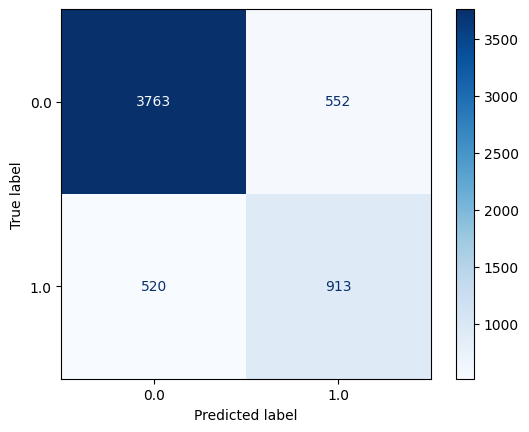

In [ ]:
print(classification_report(y_test, xgb_smote_y_pred))
xgb_smote_fscore = f1_score(y_test, xgb_smote_y_pred)

ConfusionMatrixDisplay.from_predictions(y_test, xgb_smote_y_pred, cmap="Blues");
plt.grid(False);

AdaBoost

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# AdaBoost model
ada_smote_model = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_smote_model.fit(X_train_filtered, y_smote)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
ada_smote_y_pred = ada_smote_model.predict(X_test_filtered)

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      4315
         1.0       0.58      0.55      0.56      1433

    accuracy                           0.79      5748
   macro avg       0.72      0.71      0.71      5748
weighted avg       0.78      0.79      0.79      5748



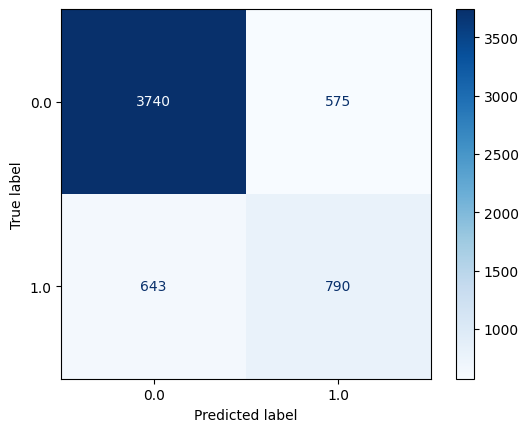

In [ ]:
print(classification_report(y_test,ada_smote_y_pred))
ada_smote_fscore = f1_score(y_test, ada_smote_y_pred)

ConfusionMatrixDisplay.from_predictions(y_test, ada_smote_y_pred, cmap='Blues');
plt.grid(False)

LightGBM

In [ ]:
# LightGBM model
lgb_smote_model = lgb.LGBMClassifier()
lgb_smote_model.fit(X_train_filtered, y_smote)

[LightGBM] [Info] Number of positive: 7046, number of negative: 10066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1725
[LightGBM] [Info] Number of data points in the train set: 17112, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.411758 -> initscore=-0.356703
[LightGBM] [Info] Start training from score -0.356703


LGBMClassifier()

In [ ]:
lgb_smote_y_pred = lgb_smote_model.predict(X_test_filtered)

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      4315
         1.0       0.62      0.67      0.65      1433

    accuracy                           0.82      5748
   macro avg       0.76      0.77      0.76      5748
weighted avg       0.82      0.82      0.82      5748



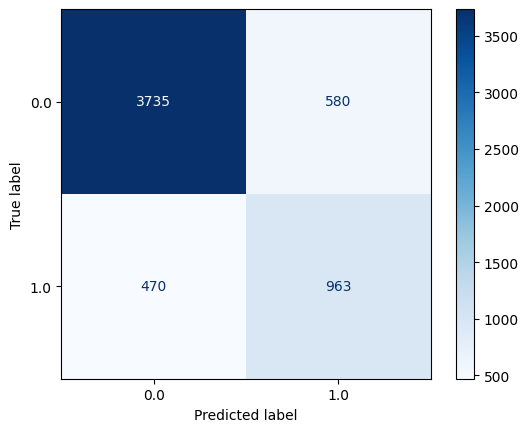

In [ ]:
print(classification_report(y_test,lgb_smote_y_pred))
lgb_smote_fscore = f1_score(y_test, lgb_smote_y_pred)

ConfusionMatrixDisplay.from_predictions(y_test, lgb_smote_y_pred, cmap='Blues');
plt.grid(False)

Summary of Results

In [ ]:
summary_2 = {
    'Models': ['Random Forest', 'Decision Tree', 'Support Vector Machine', 'Logistic Regression', 'XGBoost', 'AdaBoost', 'KNeighborsClassifier', 'LGBMClassifier'],
    'F1 Score (job change)': [rf_smote_fscore, dt_smote_fscore, svm_smote_fscore, lr_smote_fscore, xgb_smote_fscore, ada_smote_fscore, knn_smote_fscore, lgb_smote_fscore]
             }

df_summary_2 = pd.DataFrame(summary_2)
df_summary_2

,Models,F1 Score (job change)
0,Random Forest,0.556586
1,Decision Tree,0.488697
2,Support Vector Machine,0.503048
3,Logistic Regression,0.509215
4,XGBoost,0.630090
5,AdaBoost,0.564689
6,KNeighborsClassifier,0.482958
7,LGBMClassifier,0.647177


In [ ]:
# Parameters of LightGBM
lgb_smote_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
# Try to get Best Parameters
param_grid = {
              'learning_rate': [ 0.07, 0.17],
              'n_jobs': [-1],
              'max_depth':[3,7],
              'min_child_weight':[1,7],
              'colsample_bytree':[0.3,0.7],
              'n_estimators': [11,21,70],
              'class_weight': ["balanced"]
              }
 # Use GridSearchCV
lgb_grid_search = GridSearchCV (lgb_smote_model, param_grid, cv = 7, scoring = 'f1', n_jobs = -1)
lgb_grid_search.fit(X_train_filtered,  y_smote)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 7046, number of negative: 10066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1725
[LightGBM] [Info] Number of data points in the train set: 17112, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


GridSearchCV(cv=7, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.07, 0.17], 'max_depth': [3, 7],
                         'min_child_weight': [1, 7],
                         'n_estimators': [11, 21, 70], 'n_jobs': [-1]},
             scoring='f1')

In [ ]:
print(lgb_grid_search.best_params_)

{'class_weight': 'balanced', 'colsample_bytree': 0.7, 'learning_rate': 0.17, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 70, 'n_jobs': -1}


In [ ]:
print("lgb Score:"+ str(lgb_grid_search.best_score_))

lgb Score:0.8047513497036344
